# TUGAS 2 - Klasifikasi
IF4301

Anggota : 
1. Fauzi Arya Surya Abadi
( 1301194101 )
2. Nur Laili Ramadhani
( 1301194098 )

## Library

In [36]:
import statistics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
from sklearn.metrics import classification_report, accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Eksplorasi Data

## Load Data

In [37]:
# Load data kendaraan train
df_train = pd.read_csv('https://github.com/fasa2297/fml-ml2-classification/blob/main/kendaraan_train.csv?raw=true')
df_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [38]:
# Load data kendaraan test
df_test = pd.read_csv('https://github.com/fasa2297/fml-ml2-classification/blob/main/kendaraan_test.csv?raw=true')
df_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


## Identifikasi Data

Menampilkan dimensi data train dan test

In [39]:
Baris, Kolom = df_train.shape
print('Baris =', Baris, ', Kolom =', Kolom)

Baris = 285831 , Kolom = 12


In [40]:
Baris, Kolom = df_test.shape
print('Baris =', Baris, ', Kolom =', Kolom)

Baris = 47639 , Kolom = 11


Menampilkan jumlah ketertarikan

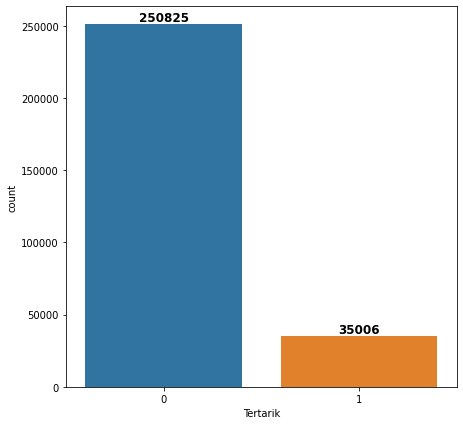

In [41]:
plt.figure(figsize=(7,7))
plots = sns.countplot(x="Tertarik", data=df_train); rects = plots.patches
labels = [df_train["Tertarik"].value_counts()[0], df_train["Tertarik"].value_counts()[1]]
for rect, label in zip(rects, labels):
  height = rect.get_height()
  plt.text(rect.get_x() + rect.get_width() / 2, height, label,ha='center', va='bottom',fontweight=600, fontsize=12)
plt.show()

## Informasi

Menampilkan informasi data 

In [42]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,285831.0,142916.000000,82512.446734,1.0,71458.5,142916.0,214373.50,285831.0
Umur,271617.0,38.844336,15.522487,20.0,25.0,36.0,49.00,85.0
SIM,271427.0,0.997848,0.046335,0.0,1.0,1.0,1.00,1.0
Kode_Daerah,271525.0,26.405410,13.252714,0.0,15.0,28.0,35.00,52.0
Sudah_Asuransi,271602.0,0.458778,0.498299,0.0,0.0,0.0,1.00,1.0
Premi,271262.0,30536.683472,17155.000770,2630.0,24398.0,31646.0,39377.75,540165.0
Kanal_Penjualan,271532.0,112.021567,54.202457,1.0,29.0,132.0,152.00,163.0
Lama_Berlangganan,271839.0,154.286302,83.694910,10.0,82.0,154.0,227.00,299.0
Tertarik,285831.0,0.122471,0.327830,0.0,0.0,0.0,0.00,1.0


In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [44]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jenis_Kelamin      47639 non-null  object
 1   Umur               47639 non-null  int64 
 2   SIM                47639 non-null  int64 
 3   Kode_Daerah        47639 non-null  int64 
 4   Sudah_Asuransi     47639 non-null  int64 
 5   Umur_Kendaraan     47639 non-null  object
 6   Kendaraan_Rusak    47639 non-null  object
 7   Premi              47639 non-null  int64 
 8   Kanal_Penjualan    47639 non-null  int64 
 9   Lama_Berlangganan  47639 non-null  int64 
 10  Tertarik           47639 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.0+ MB


Melihat missing values

In [45]:
# Melihat nilai kosong di data training
df_train.isnull().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [46]:
df_test.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

# Data pre-processing

## Fill Missing Values

In [47]:
# Fill Missing Value
df_train["Jenis_Kelamin"] = df_train["Jenis_Kelamin"].replace(np.NaN, np.random.choice(a=["Pria","Wanita"], p=[0.54,0.46]))
df_train["Umur"] = df_train["Umur"].replace(np.NaN, df_train['Umur'].mean())
df_train["SIM"] = df_train["SIM"].replace(np.NaN, np.random.choice(a=[1, 0],p=[0.9956, 0.0044]))
df_train["Kode_Daerah"] = df_train["Kode_Daerah"].replace(np.NaN, statistics.mode(df_train["Kode_Daerah"]))

df_train["Sudah_Asuransi"] = df_train["Sudah_Asuransi"].replace(np.NaN, np.random.choice(a=[0, 1],p=[0.5417, 0.4583]))
df_train["Umur_Kendaraan"] = df_train["Umur_Kendaraan"].replace(np.NaN, np.random.choice(a=["< 1 Tahun", "1-2 Tahun", "> 2 thaun"],p=[0.431, 0.527, 0.042]))
df_train["Kendaraan_Rusak"] = df_train["Kendaraan_Rusak"].replace(np.NaN, np.random.choice(a=["Pernah", "Tidak"],p=[0.5355,0.4645]))

df_train["Premi"] = df_train["Premi"].replace(np.NaN, df_train["Premi"].mean())
df_train["Kanal_Penjualan"] = df_train["Kanal_Penjualan"].replace(np.NaN, 152)
df_train["Lama_Berlangganan"] = df_train["Lama_Berlangganan"].replace(np.NaN, df_train["Lama_Berlangganan"].mean())

print(df_train.isnull().sum())

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64


In [48]:
df_train.dtypes

id                     int64
Jenis_Kelamin         object
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan        object
Kendaraan_Rusak       object
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
Tertarik               int64
dtype: object

Konversi tipe data float to int

In [49]:
ubah_tipe_data = {'Jenis_Kelamin': object,	'Umur': int,	'SIM': int,	'Kode_Daerah':int, 'Sudah_Asuransi': int,	'Umur_Kendaraan': object,
                  'Kendaraan_Rusak': object,	'Premi':int,	'Kanal_Penjualan':int,	'Lama_Berlangganan':int}
df_train = df_train.astype(ubah_tipe_data)
df_test = df_test.astype(ubah_tipe_data)
df_test.dtypes

Jenis_Kelamin        object
Umur                  int64
SIM                   int64
Kode_Daerah           int64
Sudah_Asuransi        int64
Umur_Kendaraan       object
Kendaraan_Rusak      object
Premi                 int64
Kanal_Penjualan       int64
Lama_Berlangganan     int64
Tertarik              int64
dtype: object

## Labeling Categorical Value

In [50]:
# Labeling pada data Katagorial - Kendaraan rusak
replaced_value_krusak = {"Tidak":0,"Pernah":1}
df_train["Kendaraan_Rusak"]= df_train["Kendaraan_Rusak"].replace(replaced_value_krusak)
df_test["Kendaraan_Rusak"]= df_test["Kendaraan_Rusak"].replace(replaced_value_krusak)
# Labeling pada data Katagorial - jenis kelamin rusak
replaced_value_jkelamin = {"Wanita":0, "Pria":1}
df_train["Jenis_Kelamin"]= df_train["Jenis_Kelamin"].replace(replaced_value_jkelamin)
df_test["Jenis_Kelamin"]= df_test["Jenis_Kelamin"].replace(replaced_value_jkelamin)
#concat & drop - train
umur_kendaraan = pd.get_dummies(df_train["Umur_Kendaraan"], drop_first=True)
df_train = pd.concat([df_train, umur_kendaraan], axis = 1)
df_train.drop(["Umur_Kendaraan","id","Kode_Daerah","Kanal_Penjualan"], axis=1, inplace=True)
#concat & drop - test
umur_kendaraan = pd.get_dummies(df_test["Umur_Kendaraan"], drop_first=True)
df_test = pd.concat([df_test, umur_kendaraan], axis = 1)
df_test.drop(["Umur_Kendaraan","Kode_Daerah","Kanal_Penjualan"], axis=1, inplace=True)

df_train.head()

,Jenis_Kelamin,Umur,SIM,Sudah_Asuransi,Kendaraan_Rusak,Premi,Lama_Berlangganan,Tertarik,< 1 Tahun,> 2 Tahun
0,0,30,1,1,0,28029,97,0,1,0
1,1,48,1,0,1,25800,158,0,0,1
2,0,21,1,1,0,32733,119,0,1,0
3,0,58,1,0,0,2630,63,0,0,0
4,1,50,1,0,1,34857,194,0,0,1


In [51]:
df_test.dtypes

Jenis_Kelamin        int64
Umur                 int64
SIM                  int64
Sudah_Asuransi       int64
Kendaraan_Rusak      int64
Premi                int64
Lama_Berlangganan    int64
Tertarik             int64
< 1 Tahun            uint8
> 2 Tahun            uint8
dtype: object

# Pemodelan


## LOGISTIC REGRESSION

In [52]:
class logisticRegression:

  def __init__(self,lr=0.001,n_iters=1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self,X,y):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    # gradient descent
    for _ in range(self.n_iters):
      linear_model = np.dot(X,self.weights) + self.bias
      y_predicted = self._sigmoid(linear_model)
      # compute gradients
      # Menghitung turunan dari parameter (bobot, dan bias)
      dw = (1/n_samples) * np.dot(X.T,(y_predicted-y))
      db = (1/n_samples) * np.sum(y_predicted-y)
      self.weights -= self.lr *dw
      self.bias -= self.lr * db 

  def predict(self,X):
    linear_model = np.dot(X,self.weights) + self.bias
    y_predicted = self._sigmoid(linear_model)
    y_predicted_cls = [1 if i>0.5 else 0 for i in y_predicted]
    return y_predicted_cls
  
  def _sigmoid(self,x):
    return(1/(1+np.exp(-x)))

## LINEAR REGRESSION

In [53]:
class linearRegression:

    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            # Menghitung prediksi: y_pred atau h(x)
            y_predicted = np.dot(X, self.weights) + self.bias
            # compute gradients
            # Menghitung turunan dari parameter (bobot, dan bias)
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
 

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Evaluasi Akurasi Model

## Akurasi Logistic Regression

In [54]:
#Feature Selection
X1 = df_train.iloc[:,[0,1,2,3,4,5,6,7,8,9]].values
X2 = df_test.iloc[:,[0,1,2,3,4,5,6,7,8,9]].values

y1 = df_train.iloc[:,7].values
y2 = df_test.iloc[:,7].values

#Scale data
min_max_scaler = preprocessing.MinMaxScaler()
X1 = min_max_scaler.fit_transform(X1)
X2 = min_max_scaler.fit_transform(X2)

#Split data
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3)

log_model = logisticRegression()
log_model.fit(X_train, y_train)

log_predict1 = log_model.predict(X_test)
log_predict2 = log_model.predict(X2)

classes2 = ['Tidak Tertarik', 'Tertarik']
print(classification_report(y_test, log_predict1, target_names=classes2)); var_handle = y_test
print("Akurasi kendaraan_train dari model :" , accuracy_score(y_test,log_predict1),"\n")

print(classification_report(y2, log_predict2, target_names=classes2))
print("Akurasi kendaraan_test dari model :" , accuracy_score(y2,log_predict2),"\n")

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

                precision    recall  f1-score   support

Tidak Tertarik       0.88      1.00      0.93     75259
      Tertarik       0.00      0.00      0.00     10491

      accuracy                           0.88     85750
     macro avg       0.44      0.50      0.47     85750
  weighted avg       0.77      0.88      0.82     85750

Akurasi kendaraan_train dari model : 0.8776559766763848 

                precision    recall  f1-score   support

Tidak Tertarik       0.88      1.00      0.93     41778
      Tertarik       0.00      0.00      0.00      5861

      accuracy                           0.88     47639
     macro avg       0.44      0.50      0.47     47639
  weighted avg       0.77      0.88      0.82     47639

Akurasi kendaraan_test dari model : 0.8769705493398267 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Akurasi Linear Regresion

In [55]:
#Feature Selection
X1 = df_train.iloc[:,[0,1,2,3,4,5,6,7,8,9]].values
X2 = df_test.iloc[:,[0,1,2,3,4,5,6,7,8,9]].values

y1 = df_train.iloc[:,7].values
y2 = df_test.iloc[:,7].values
#Scale data
min_max_scaler = preprocessing.MinMaxScaler()
X1 = min_max_scaler.fit_transform(X1)
X2 = min_max_scaler.fit_transform(X2)

#Split data
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=1234)

lin_model = linearRegression(learning_rate=0.01, n_iters=1000)
lin_model.fit(X_train, y_train)

lin_predict1 = lin_model.predict(X_test)
lin_predict2 = lin_model.predict(X2)

mse = mean_squared_error(y_test, lin_predict1)
print("MSE:", mse)

from sklearn import metrics
train = metrics.explained_variance_score(y_test, lin_predict1)
test = metrics.explained_variance_score(y2, lin_predict2)
print("Akurasi kendaraan_train dari model :" , train,"\n")
print("Akurasi kendaraan_test dari model :" , test,"\n")

MSE: 0.014008719147738814
Akurasi kendaraan_train dari model : 0.8690310966862416 

Akurasi kendaraan_test dari model : 0.8698657440370842 



# Eksperimen

## Logistic Regression: *Perbandingan Akurasi Lib & Model*

In [56]:
#Feature Selection
X1 = df_train.iloc[:,[0,1,2,3,4,5,6,7,8,9]].values
X2 = df_test.iloc[:,[0,1,2,3,4,5,6,7,8,9]].values

y1 = df_train.iloc[:,7].values
y2 = df_test.iloc[:,7].values
#Scale data
min_max_scaler = preprocessing.MinMaxScaler()
X1 = min_max_scaler.fit_transform(X1)
X2 = min_max_scaler.fit_transform(X2)

#Split data
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3)
#-------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

log_lib = LogisticRegression(class_weight = 'auto')
log_lib.fit(X_train, y_train)
log_lib_predct1 = log_lib.predict(X_test)
log_lib_predct2 = log_lib.predict(X2)

print("Akurasi lib Logistic Regression","\n")
print(classification_report(y_test, log_lib_predct1))
print("Akurasi pada kendaraan_train :", accuracy_score(y_test,log_lib_predct1))
print("Akurasi pada kendaraan_test :", accuracy_score(y2,log_lib_predct2),"\n")
print("-------------------------------------------------------------")
print("Akurasi model Logistic Regression","\n")
print(classification_report(y_test, log_predict1))
print("Akurasi kendaraan_train dari model :" , accuracy_score(y_test,log_predict1))
print("Akurasi kendaraan_test dari model :" , accuracy_score(y2,log_predict2),"\n")

Akurasi lib Logistic Regression 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     75252
           1       1.00      1.00      1.00     10498

    accuracy                           1.00     85750
   macro avg       1.00      1.00      1.00     85750
weighted avg       1.00      1.00      1.00     85750

Akurasi pada kendaraan_train : 1.0
Akurasi pada kendaraan_test : 1.0 

-------------------------------------------------------------
Akurasi model Logistic Regression 

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     75252
           1       0.00      0.00      0.00     10498

    accuracy                           0.88     85750
   macro avg       0.44      0.50      0.47     85750
weighted avg       0.77      0.88      0.82     85750

Akurasi kendaraan_train dari model : 0.8775743440233236
Akurasi kendaraan_test dari model : 0.8769705493398267 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
#predict via logreg
big = pd.DataFrame({'Actual': y_test, 'Predicted': log_lib_predct1})
big

,Actual,Predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
85745,0,0
85746,0,0
85747,0,0
85748,0,0


## Linear Regression: *Perbandingan Akurasi Lib & Model*

In [58]:
#Feature Selection
X1 = df_train.iloc[:,[0,1,2,3,4,5,6,7,8,9]].values
X2 = df_test.iloc[:,[0,1,2,3,4,5,6,7,8,9]].values

y1 = df_train.iloc[:,7].values
y2 = df_test.iloc[:,7].values
#Scale data
min_max_scaler = preprocessing.MinMaxScaler()
X1 = min_max_scaler.fit_transform(X1)
X2 = min_max_scaler.fit_transform(X2)

#Split data
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=1234)
from sklearn.linear_model import LinearRegression
lin_lib_model = LinearRegression()
lin_lib_model.fit(X_train, y_train)

lin_lib_predict1 = lin_lib_model.predict(X_test)
lin_lib_predict2 = lin_lib_model.predict(X2)

print("Akurasi lib Linear Regression",)
mse_lib = mean_squared_error(y_test, lin_lib_predict1)
print("MSE:", mse_lib)
train_lib = metrics.explained_variance_score(y_test, lin_lib_predict1)
test_lib = metrics.explained_variance_score(y2, lin_lib_predict2)
print("Akurasi kendaraan_train dari model :" , train_lib)
print("Akurasi kendaraan_test dari model :" , test_lib,"\n")

print("Akurasi model Linear Regression")
mse = mean_squared_error(y_test, lin_predict1)
print("MSE:", mse)
print("Akurasi kendaraan_train dari model :" , train)
print("Akurasi kendaraan_test dari model :" , test,"\n")

Akurasi lib Linear Regression
MSE: 4.433080426042392e-32
Akurasi kendaraan_train dari model : 1.0
Akurasi kendaraan_test dari model : 1.0 

Akurasi model Linear Regression
MSE: 0.014008719147738814
Akurasi kendaraan_train dari model : 0.8690310966862416
Akurasi kendaraan_test dari model : 0.8698657440370842 



In [59]:
#predict via logreg
box = pd.DataFrame({'Actual': y_test, 'Predicted': lin_lib_predict1})
box

,Actual,Predicted
0,0,1.146706e-16
1,0,9.850237e-17
2,0,1.967962e-16
3,0,-4.519284e-17
4,0,5.354699e-17
...,...,...
57162,1,1.000000e+00
57163,0,5.718179e-17
57164,1,1.000000e+00
57165,0,1.445540e-16


# Kesimpulan

*Logistic Regression*
> Akurasi kendaraan_train dari model : 0.8776559766763848

> Akurasi kendaraan_test dari model : 0.8769705493398267

*Linear Regression*
> Akurasi kendaraan_train dari model : 0.8690310966862416

> Akurasi kendaraan_test dari model : 0.8698657440370842

*Kesimpulan*
> Dari percobaan yang dilakukan dengan menggunakan data set dan data train diketahui bahwa menggunakan metode Logistic Regression menghasilkan hasil akurasi tertinggi dibandingkan dengan metode Linear Reegression yaitu 0.8769705493398267 paa data set kendaraan_train dan 0.8769705493398267 pada data set kendaraan_test. Dan kami juga membandingkan model dengan library model, cukup aneh bagi kami library model mendapatkan akurasi 1.